# Conic Sections

Consider a cone's surface given by:  

\begin{equation}\tag{1}
    (z-z_0)^2 = a^2\big((x-x_0)^2 + (y-y_0)^2\big)\quad\quad\text{where }a\ne0
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Example
Assuming $z_0,y_0,x_0=0$ and $a = 10$, via equation (1),  

$$ f(x, y) := z = \pm 10\sqrt{x^2+y^2}$$

The intersection of the cone given by the above function and the plane given by $(x=1,y,z)$ gives a hyperbola that is also given by:  

$$ g(y) = z = \pm10\sqrt{1+y^2} \quad\implies\quad 0.01z^2 = y^2 + 1$$

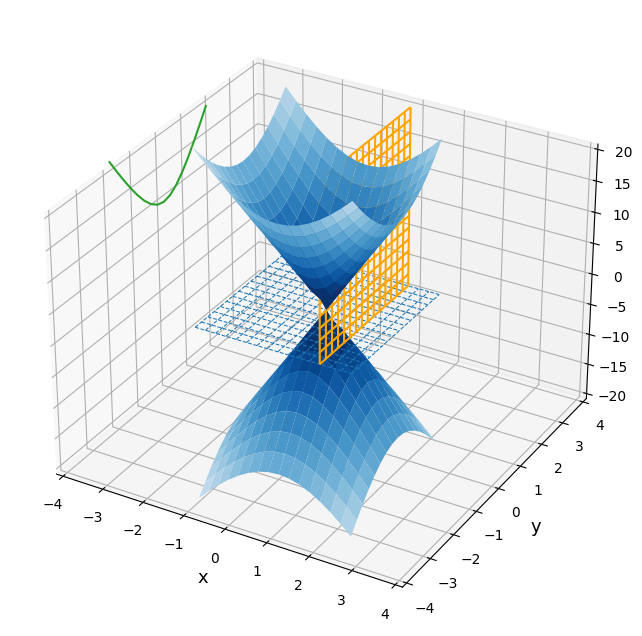

In [2]:
# Create the domain.
x = np.arange(-2, 2, 0.25)
y = np.arange(-2, 2, 0.25)
x, y = np.meshgrid(x, y)

# Create the x,y plane
xy = np.full(shape=x.shape, fill_value=0.0)

# Define the function.
F = [10*np.sqrt(x**2 + y**2), -10*np.sqrt(x**2+y**2)]
f_p = F[0]; f_n = F[1]

# Identify the codomain.
z_p = np.linspace(0, f_p.max(), num=16)
z_p, dum = np.meshgrid(z_p,np.arange(-2, 2, 0.25))
z_n = np.linspace(f_n.min(), 0, num=16)
dum, z_n = np.meshgrid(np.arange(-2, 2, 0.25), z_n)

# Now, define the function that gives the intersecting plane.
b = np.full(shape=(16,16), fill_value=1.0)

# Create the figure and axes objects.
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(8, 8))
ax.set_xlim(-4, 4); ax.set_ylim(-4, 4); ax.set_zlim(-20, 20)
ax.set_xlabel('x', size=13); ax.set_ylabel('y', size=13); ax.set_zlabel('z', size=13)

# Plot the data.
ax.plot_surface(x, y, f_p, vmin=f_p.min()+4, vmax=f_p.max()*1.231, cmap=plt.colormaps['Blues'].reversed())
# ax.plot_wireframe(x, y, f_p)
ax.plot_surface(x, y, f_n, vmin=f_n.min()*1.231, vmax=f_n.max()-4, cmap=plt.colormaps['Blues'])
ax.plot_wireframe(x, y, xy, lw=0.75, ls='--')
ax.plot_wireframe(b, y, z_p, color='orange')

# Create the domain of g(y), the function that gives the aforementioned hyperbola
y = np.arange(-2, 2, 0.25)

# Define g(y).
g_p = 10*np.sqrt(1+y**2)

# Plot the 2d data.
ax.plot(y, g_p, zs=-4, zdir='x')

## Definition

A conic is the curve obtained as the intersection of a plane, called the cutting plane or $\mathbf{P}$, with the surface of a double cone (a cone with two nappes) or $\mathbf{S}$.  

There are three types of conics: the ellipse, parabola, and [hyperbola](#Hyperbola). The circle is a special kind of ellipse, although historically Apollonius considered it a fourth type. 

Ellipses arise when the intersection of the cone and plane is a closed curve, which occurs when the slope of the cone, denoted as '$a$', is greater then the slope of the plane.

The circle is obtained when the cutting plane is parallel to the plane of the generating circle of the cone; for a right cone, this means the cutting plane is perpendicular to the axis. 

If the cutting plane is parallel to exactly one generating line of the cone (i.e. if the plane has a slope that is equal to the slope of the cone), then the conic is unbounded and is called a *parabola*. 

In the remaining case, the figure is a *hyperbola*: the plane intersects *both* halves of the cone, producing two separate unbounded curves.  It may be worth emphasizing that, in the case of a hyperbola, the cutting plane is perpendicular to the generating circle of the cone.

## Eccentricity, Focus and Directrix



Alternatively, one can define a conic section purely in terms of plane geometry: it is the locus of all points $P$ whose distance to the focus, a fixed point denoted as '$F$', is a constant multiple of the distance from $P$ to the directrix, a fixed line denoted as  '$L$';  Said constant multiple is known as the eccentricity, denoted as '$e$'. For $0 < e < 1$ we obtain an ellipse, for $e = 1$ a parabola, and for $e > 1$ a hyperbola. 

Conic sections of varying eccentricity sharing a focus point and directrix line, including an ellipse (red, $e = 1/2$), a parabola (green, $e = 1$), and a hyperbola (blue, $e = 2$). The conic of eccentricity $0$ in this figure is an infinitesimal circle centered at the focus, and the conic of eccentricity $\infty$ is an infinitesimally separated pair of lines.  

A circle of finite radius has an infinitely distant directrix, while a pair of lines of finite separation have an infinitely distant focus.

If the angle between the surface of the cone and its axis is $\gamma$ and the angle between the cutting plane and the axis is $\varphi$ the eccentricity is $\cos\gamma / \cos\varphi$.  

$$ e = \frac{\cos\gamma}{\cos\varphi}\quad\quad\text{where }\tan\big(0.5\pi - \gamma\big) = a$$

To ellaborate, suppose the aforementioned structures rest on a 2d vector plane with an origin at $F$, the focus, the unit vector $\mathbf{i}$ is parallel to $L$, and $\mathbf{j}$ points away from $L$, the directrix.  A variable vector $\mathbf{P}$ is used to map out each of the aforementioned structures.  The point of incidence between the perpendicular dropped from $P$ to $L$ is denoted as '$P'$', the point of incidence between the perpendicular dropped from $F$ to $L$ is denoted as '$F'$',  and the direction of $\mathbf{P}$ is denoted as '$\theta$'.  

![eccentricity](Figures/Eccentricity3.png)

Of course, it follows that $|\mathbf{P}| = |FP| = e\cdot|PP'|$.  It also follows that:  

\begin{equation}\tag{15}
    \text{a: }|F'P'| = P_x \quad\quad \text{b: }\;\sin\theta = \frac{P_y}{|\mathbf{P}|} \quad\quad \text{c: }\;\cos\theta = \frac{P_x}{|\mathbf{P}|}
\end{equation}

Assuming $P$ is below $L$,  

\begin{equation}\tag{16b}
    |FF'| = -|PP'|-P_y = -\frac{|\mathbf{P}|}{e} - P_y
\end{equation}

Via equations (15b) and (16b),  

$$ |FF'| = -|\mathbf{P}|\left(\frac{1}{e} + \sin\theta\right) = -|\mathbf{P}|\,\frac{1 + e\sin\theta}{e}$$

Thus,  

\begin{equation}\tag{12b}
    |\mathbf{P}| = |\mathbf{P}|(\theta) = - \frac{e|FF'|}{1+e\sin\theta}
\end{equation}

Our assumption that $P$ is below $L$ means that $P_y = |\mathbf{P}|\sin\theta < -|FF'|$.  Which implies that:  

$$ |FF'| < -|\mathbf{P}|\sin\theta $$

Assuming $P$ is above or at $L$,  

\begin{equation}\tag{16}
    |FF'| = |PP'| - P_y = \frac{|\mathbf{P}|}{e} - P_y 
\end{equation}

Via equations (15b) and (16) and substitution,  

$$ |FF'| = |\mathbf{P}|\left(\frac{1}{e} - \sin\theta\right) = |\mathbf{P}|\,\frac{1 - e\sin\theta}{e}$$

\begin{equation}\tag{12}
    |\mathbf{P}| = |\mathbf{P}|(\theta) = |FF'|\,\frac{e}{1-e\sin\theta}
\end{equation}

The $y$-compliment of $\mathbf{P}$ as a function of the $x$-compliment is given by:  

$$ \frac{P_x^2+P_y^2}{e^2} = \big(|FF'| + P_y\big)^2 = |FF'|^2 + 2P_y|FF'| + P_y^2$$

Multiplying throughout by $e^2$ gives:  

\begin{equation}\tag{13}
    P_x^2 + P_y^2 = e^2\big(|FF'|^2 + 2P_y|FF'| + P_y^2\big) \quad\implies\quad P_y^2\big(1-e^2\big) - 2e^2|FF'|P_y + P_x^2 - e^2|FF'|^2 = 0
\end{equation}

Via the right hand equation of the above notion and the quadratic formula,  

$$ P_y = \frac{2e^2|FF'|\pm\sqrt{\big(2e^2|FF'|\big)^2 + 4\big(e^2-1\big)\big(P_x^2 - e^2|FF'|^2\big)}}{2\big(1-e^2\big)}$$

\begin{equation}\tag{13a}
    = \frac{e^2|FF'|\pm\sqrt{|FF'|^2 + P_x^2\big(e^2-1\big) + e^2|FF'|^2\big(1-e^2\big)}}{1-e^2}
\end{equation}

And, $P_x^2$ as a function of $P_y$ is given by:  

\begin{equation}\tag{13b}
    P_x^2 = P_y^2\big(e^2 - 1\big) + 2e^2|FF'|P_y + e^2|FF'|^2
\end{equation}

Assuming $e=1$, we have an equation that gives a **parabola**.  

$$ P_x^2 = 2|FF'|P_y + |FF'|^2 $$

Dividing throughout by $2|FF'|$ gives:  

\begin{equation}\tag{14}
    P_y = \frac{P_x^2}{2|FF'|} - 0.5|FF'| 
\end{equation}

It is worth emphasizing that the denominator of the definition of $|\mathbf{P}|(\theta)$ is never equal to zero when $0\le e<1$, which, perhaps with the exception of $e=0$, is the eccentricity of an ellipse.

$$ 0\le e < 1 \quad\implies\quad 1-e\sin\theta \ne 0 \;\forall \theta\in\mathbb{R}$$

When $e=1$, which is the eccentricity of a parabola, the denominator of $|\mathbf{P}|(\theta)$ is equal zero when $\theta=0.5\pi$, implying that the limit of $|\mathbf{P}|$ is infinity as $\theta$ approaches $0.5\pi$.  

$$ 1-\sin0.5\pi = 0 \quad\implies\quad \lim_{\theta \to 0.5\pi}{|\mathbf{P}|} = \infty$$

$$ 1-\sin\theta \ne 0 \;\forall\theta\in\mathbb{R}\;:\;0\le \theta < 2\pi \land \theta \ne 0.5\pi$$

And, when $1<e<\infty$, which is the eccentricity of the hyperbola, the denominator of $|\mathbf{P}|(\theta)$ is equal to zero at two angles that are centered around $0.5\pi$ and deviate more from this center the larger $e$ is.

Note that since each structure is reflectively symmetric about $\mathbf{j}$ or the $y$-axis,  

\begin{equation}\tag{9}
    |\mathbf{P}|\big(\pi - \theta\big) = |\mathbf{P}|\big(\theta\big)
\end{equation}

Which implies that:  

\begin{equation}\tag{9}
    \text{a: }\;|PP'|\big(\theta\big) = |PP'|\big(\pi-\theta\big)\quad\quad\text{and}\quad\quad\text{b: }|\mathbf{P}'|\big(\theta\big) = |\mathbf{P}'|\big(\pi-\theta\big)
\end{equation}

### Examples
Throughout the following examples, suppose there exists an $x,y$-axes rests on the same plane as our ellipse with it's origin is at the initial point of $\mathbf{P}$, an $x$-axis that points in the same direction as $\mathbf{i}$ and a $y$-axis that points in the same direction as $\mathbf{j}$.

Note that it now follows that $L$, in $x,y$ Cartesian coordinates, is given by $y=-1$.

### Ellipse

Assuming $e=0.5$ and $|FF'|=1$, we have an ellipse given by, in polar coordinates, via equation (12),  

$$ |\mathbf{P}| = |\mathbf{P}|(\theta) = \frac{1}{2(1-0.5\sin\theta)}$$

And, in Cartesian coordinates, presupposing an $x,y$-axes rests on the same plane as our ellipse with it's origin is at the initial point of $\mathbf{P}$, an $x$-axis that points in the same direction as $\mathbf{i}$ and a $y$-axis that points in the same direction as $\mathbf{j}$, via equation (13b),  

$$ x^2 =0.5y -0.75y^2 + 0.25 $$

Via the above equation, $ y = 0 \;\implies\; x = \pm0.5$, which is consistent with the notion that $|\mathbf{P}|(0) , |\mathbf{P}|(\pi) = 0.5$.

Now, via the above quadratic equation and the quadratic formula,  

$$ y :=f(x)= \frac{0.5\pm\sqrt{0.25 + 3\big(0.25-x^2\big)}}{1.5} = \frac{0.5\pm\sqrt{1-3x^2}}{1.5}$$

$$ f(0) = \left\{1, -\frac{1}{3}\right\}$$

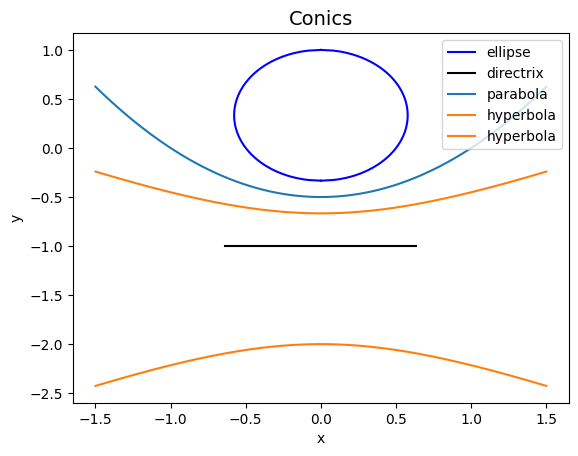

In [30]:
# Create the domain(s).
y = np.linspace(-1/3,1,num=200)
x = np.linspace(-1.5,1.5,num=200)

# Define the function(s).
x_p = np.sqrt(0.5*y - 0.75*y**2 + 0.25)
x_n = -x_p
f_p = (np.sqrt(3*x**2+4)-4)/3
f_n = -(np.sqrt(3*x**2+4)+4)/3
g = 0.5*x**2 - 0.5

# Create the figure and axes objects.
fig, ax = plt.subplots()
ax.set_title('Conics',size=14)
ax.set_xlabel('x')
ax.set_ylabel('y')

# Plot the data.
ax.plot(x_p, y, label='ellipse', color='blue')
ax.plot(x_n, y, color='blue')
ax.plot(np.linspace(*ax.get_xlim(), num=50), [-1 for i in range(50)], label='directrix', color='black')
ax.plot(x, g, label='parabola')
[hyperbola_p] = ax.plot(x, f_p, label='hyperbola')
ax.plot(x, f_n, color = hyperbola_p.get_color())
ax.legend()

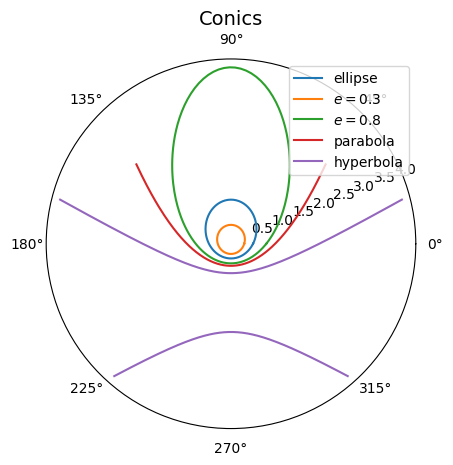

In [38]:
# Create the domain(s).
theta = np.linspace(0, 2*np.pi, num=200)
theta2 = np.linspace(-np.pi - np.radians(40), np.radians(40), num=200)
theta5_p = np.linspace(-np.radians(180+14.48), np.radians(14.48), num=200)
theta5_n = np.linspace(np.radians(180+48.59), np.radians(360-48.59), num=200)


# Define the function(s).
magP = 1/(2-np.sin(theta))
magP2 = 1/(1-np.sin(theta2))
e = 0.3
magP3 = e/(1-e*np.sin(theta))
e = 0.8
magP4 = e/(1-e*np.sin(theta))
magP5_p = 2/(1-2*np.sin(theta5_p))
magP5_n = -2/(1+2*np.sin(theta5_n))
    

# Create figure and axes objects.
fig, ax = plt.subplots(subplot_kw=dict(polar=True))
ax.set_title('Conics', size=14)
ax.grid()

# Plot the data.
ax.plot(theta, magP, label='ellipse')
ax.plot(theta, magP3, label=r'$e=0.3$')
ax.plot(theta, magP4, label=r'$e=0.8$')
ax.plot(theta2, magP2, label='parabola')
[hyperbola_p] = ax.plot(theta5_p, magP5_p, label='hyperbola')
ax.plot(theta5_n, magP5_n, color=hyperbola_p.get_c())
ax.legend()

### Parabola
Assuming $e=1$ and $|FF'|=1$, via an equation that is found above, our parabola in $x,y$ Cartesian coordinates is given by the equations on both sides of the following logical connective:  

$$ x^2 = 2y + 1 \quad\implies\quad  y = 0.5\big(x^2 - 1\big)$$

And, in polar coordinates, via equation (12),  

$$ |\mathbf{P}|=|\mathbf{P}|(\theta) = \frac{1}{1-\sin\theta}$$

### Hyperbola
Assuming $e=2$ and $|FF'|=1$, via equation (13b),  

$$ x^2 = 3y^2 + 8y + 4$$

Via the above equations and the quadratic formula,  

$$ y := f(x) = \frac{-8\pm\sqrt{64 - 12\big(4-x^2\big)}}{6} = \frac{-4\pm\sqrt{16 - 3\big(4-x^2\big)}}{3}$$

$$ y = f(x) = \frac{-4\pm\sqrt{3x^2 + 4}}{3}$$

Thus,  

$$ f_\mathrm{p}(x) = \frac{\sqrt{3x^2+4}-4}{3} \quad\quad\text{and}\quad\quad f_\mathrm{n}(x) = -\frac{4+\sqrt{3x^2+4}}{3}$$

As far as the polar coordinates are concerned, equation (12) is incomplete since what it assumes lacks consistency with the assumptions of our hyperbola;  $P$ is above $L$ for the top half of the hyperbola but is below $L$ for the bottom half.  To ellaborate:  

$$ f_\mathrm{p}(x) > -1\;\forall x\in\mathbb{R}$$

$$ \sqrt{3x^2 + 4} > 1 \quad\implies\quad 3x^2 + 4> 1 \quad\implies\quad x^2>-1$$

And,  $x^2>-1\;\forall x\in\mathbb{R}$.

However, there exists an improper subset of the domain of $f_\mathrm{n}(x)$ such that $f_\mathrm{n}(x_\mathrm{n})<-1$ for all $x_\mathrm{n}$ in said improper subset, henceforth '$X$'.  

$$ \exists X\subseteq \mathbb{R} \;:\; f_\mathrm{n}(x_\mathrm{n})<-1\;\forall x_\mathrm{n}\in X$$

$$ 4+\sqrt{3x_\mathrm{n}^2+4} > 3 \quad\implies\quad 3x_\mathrm{n}^2 + 4 > 1 \quad\implies\quad x_\mathrm{n}^2>-1 $$

Finally, since $x_\mathrm{n}^2>-1\;\forall x_\mathrm{n}\in\mathbb{R}$, $X = \mathbb{R}$.  Thus, the entire bottom half of our hyperbola is below the directrix, which has already been implied by a caveat to equation (12) found above.

$$ f_\mathrm{p}'(x) = \frac{6x}{6\sqrt{3x^2+4}} = \frac{x}{\sqrt{3x^2+4}}$$

It is worth noting that $f_\mathrm{p}'(0)=0$ and that the limit of $f_\mathrm{p}'(x)$ as $x$ approaches: infinity is $1/\sqrt{3}$, and negative infinity is $-1/\sqrt{3}$.  This information allows us to find the domain of the function that gives the top half of our hyperbola in polar coordinates.  Via equation (12), this function, denoted as '$|\mathbf{P}_\mathrm{p}|(\theta)$', is:  

$$ |\mathbf{P}_\mathrm{p}| = |\mathbf{P}_\mathrm{p}|(\theta) = \frac{2}{1-2\sin\theta} \quad\quad\text{where }\theta_\mathrm{l} - 2\pi<\theta < \theta_\mathrm{r}$$

The domain of this function is defined by $\theta_\mathrm{l}-2\pi<\theta<\theta_\mathrm{r}$, where  

$$ \theta_\mathrm{l} = \pi - \arctan \frac{1}{\sqrt{3}} = 150^\circ \quad\quad\text{and}\quad\quad \theta_\mathrm{r} = \arctan\frac{1}{\sqrt{3}} = 30^\circ$$

Thus, the domain is $-210^\circ < \theta < 30^\circ$.

In [32]:
np.degrees(np.arctan(-1/np.sqrt(3)))

-30.000000000000004

Now, for ploting purposes, we need to find a subset of the domain of $|\mathbf{P}_\mathrm{p}|(\theta)$, denoted as '$\Theta$', such that:  

$$ |\mathbf{P}_\mathrm{p}|(\vartheta) < 4 \;\forall \vartheta \in\Theta$$

$$ \frac{1}{1-2\sin\vartheta_\mathrm{e}} = 2\quad\quad\text{where }\vartheta_\mathrm{e} = \{\min\Theta,\max \Theta \}$$

Which implies that:  

$$ 0.5 = 1-2\sin\vartheta_\mathrm{e}$$

$$ \sin\vartheta_\mathrm{e} = 0.25 \quad\implies\quad \vartheta_\mathrm{e} = \arcsin0.25 = \{\approx 14.48^\circ, 180^\circ - \approx14.48^\circ\}$$

In [35]:
np.degrees(np.arcsin(0.25))

14.477512185929925

Thus, for plotting purposes,  

$$ -\approx14.48^\circ - 180^\circ < \theta < \approx 14.48^\circ$$

To find the critical points of the curve given by $f_\mathrm{p}'(x)$ we must first find $f_\mathrm{p}''(x)$.  

$$ f_\mathrm{p}''(x) = \frac{1}{\sqrt{3x^2+4}} - \frac{3x^2}{\sqrt{\big(3x^2 + 4\big)^3}}$$

$$ = \frac{3x^2 + 4 - 3x^2}{\sqrt{\big(3x^2+4\big)^3}} = \frac{4}{\sqrt{\big(3x^2+4\big)^3}}$$

As it turns out, $f_\mathrm{p}'(\theta)$ has no critical points, implying that the magnitude of the slope of the top half of our hyperbola gets larger with the magnitude of $x$.

And, via equation (12b), the function that gives the bottom half of our hyperbola in polar coordinates is:  

$$|\mathbf{P}_\mathrm{n}|= |\mathbf{P}_\mathrm{n}|(\theta) = - \frac{2}{1+2\sin\theta} \quad\quad\text{where }\; 210^\circ < \theta < 330^\circ$$

The domain of this function is defined by $-150^\circ = 210^\circ < \theta < 330^\circ = -30^\circ$.

Now, for plotting purposes, we must find a subset of the aforementioned domain, denoted as '$\Theta$', such that:  

$$ |\mathbf{P}_\mathrm{n}|(\vartheta) < 4 \;\forall \vartheta \in \Theta$$

$$ \frac{1}{1+2\sin\vartheta_\mathrm{e}} = -2 \quad\quad\text{where }\vartheta_\mathrm{e} = \{\min\Theta,\max\Theta\}$$

$$ 1 + 2\sin\vartheta_\mathrm{e} = -0.5 \quad\implies\quad \sin\vartheta_\mathrm{e} = -0.75$$

$$ \vartheta_\mathrm{e} = -\arcsin0.75 = \{\approx -48.59^\circ, 180^\circ + \approx 48.59^\circ\}$$

In [37]:
np.degrees(np.arcsin(0.75))

48.590377890729144

$$ |\mathbf{P}_\mathrm{n}|\big(210^\circ\big) = |\mathbf{P}_\mathrm{p}|\big(30^\circ\big) = \infty$$

In [39]:
np.sin(np.radians(210))

-0.5000000000000001

**Proposition**:  $|\mathbf{P}_\mathrm{n}|(\theta) = -|\mathbf{P}_\mathrm{p}|(-\theta) \quad\text{for }210^\circ < \theta < 330^\circ$.

**Proof**:  

$$ -|\mathbf{P}_\mathrm{p}|(-\theta) = -\frac{2}{1-2\sin-\theta} = -\frac{2}{1+2\sin\theta} = |\mathbf{P}_\mathrm{n}|(\theta)$$

## Conic Parameters

In addition to the eccentricity ($e$), foci, and directrix, various geometric features and lengths are associated with a conic section.

The *principal axis* is the line joining the foci of an ellipse or hyperbola, and its midpoint is the curve's center. A parabola has no center.

The *linear eccentricity* ($c$) is the distance between the center and a focus.

The *latus rectum* is the [chord](https://en.wikipedia.org/wiki/Chord_(geometry)) parallel to the directrix and passing through a focus; its half

# Hyperbola
One type of conic section is the hyperbola.  First, let's consider the generic case of the intersection between the plane given by:  

\begin{equation}\tag{2}
    f(x,y) := y = b\ne 0
\end{equation}

and the conic surface given by:  

\begin{equation}\tag{3}
    z^2 = a^2\big(x^2 + y^2\big) \quad\implies\quad g(x,y):=z=\pm a\sqrt{x^2+y^2}
\end{equation}

Note, the above equations assumes that $z_0,y_0,x_0=0$.  Now, via equations (2) and (3) and substitution,  

\begin{equation}\tag{4}
    z^2 = a^2\big(x^2 + b^2\big)\quad\implies\quad h(x,y) :=z=\pm a\sqrt{x^2+b^2}
\end{equation}

Since the conic surface given by equation (3), henceforth '$\mathbf{S}$', is rotationally symmetric around the $z$-axis, the plane given by equation (2), henceforth '$\mathbf{P}$', may be rotated around the $z$-axis by any degree of rotation $\alpha$ and the hyperbola formed by the intersection of $\mathbf{S}$ and the plane post-rotationed, denoted as '$\mathbf{\hat{P}}$' is congruent with the hyperbola formed by the intersection pre-rotation.

To find the equation that gives $\mathbf{\hat{P}} = \mathrm{rotate}\big(\mathbf{P},\alpha\big)$, first note that both the line formed by the intersection of the $x,y$-plane and $\mathbf{P}$ and the line formed by the intersection of the $x,y$-plane and $\mathbf{\hat{P}}$, denoted as '$\mathbf{L}$' and '$\mathbf{\hat{L}}$' respectively, are tangential to a circle resting on the $x,y$-plane with a radius of $r=b$ and a center at origin.

It may be worth noting that $\mathbf{\hat{L}}=\mathrm{rotate}\big(\mathbf{L},\alpha\big)$.

The function that gives $\mathbf{L}$ is, via equation (2),  

\begin{equation}\tag{2a}
    f(x):=y=b\ne 0
\end{equation}

And, the function that gives $\mathbf{\hat{L}}$ is of the form:  

$$ \hat{f}(x):=y=\tan(\alpha)x + \beta \quad\quad\text{where }\beta = -\tan(\alpha)x_\mathrm{i}$$

Note that '$x_\mathrm{i}$' denotes the $x$-intercept, which can be found via the following trigonometric identity:  

$$ -\sin\alpha = \frac{b}{x_\mathrm{i}}\quad\implies\quad x_\mathrm{i} = -\frac{b}{\sin\alpha} = -b\sec\alpha$$

Thus,  

$$ \beta = \frac{b}{\cos\alpha} = b\csc\alpha$$

Which means that:  

\begin{equation}\tag{5}
    \hat{f}(x) = \tan(\alpha)x + b\csc\alpha = \csc\alpha\big(\sin(\alpha)x + b\big)
\end{equation}

And, finally, the corresponding plane, $\mathbf{\hat{P}}$, is given by:  

\begin{equation}\tag{5a}
    \hat{f}(x,y):=\hat{f}(x) = y = \csc\alpha\big(\sin(\alpha)x+b\big)
\end{equation}

Now, via equations (5a) and (3) and subsitution, the hyperbola formed by the intersection of $\mathbf{\hat{P}}$ and $\mathbf{S}$, henceforth $\mathbf{\hat{H}}$, is given by:  

$$ z^2=a^2\Big(x^2 + \csc^2\alpha\big(\sin^2(\alpha)x + 2bx\sin\alpha + b^2 \big)\Big)$$

$$= a^2\Big(x^2\big(1+\tan^2\alpha\big) + 2bx\tan\alpha\csc\alpha + b^2\csc^2\alpha\Big)$$

$$ = a^2\big(x^2\csc^2\alpha + 2bx\csc^2\alpha\sin\alpha + b^2\csc^2\alpha\big)$$

\begin{equation}\tag{4a}
    z^2 = a^2\csc^2\alpha\big(x^2 + 2bx\sin\alpha + b^2\big) \quad\implies\quad \hat{h}(x,y)=z=\pm a\csc\alpha\sqrt{x^2+2bx\sin\alpha + b^2}
\end{equation}

It may be worth recalling that $\mathbf{H}\cong\mathbf{\hat{H}}$, where $\mathbf{H}$ is the hyperbola formed by the intersection between $\mathbf{S}$ and $\mathbf{P}$, which is given by $h(x,y)$, a function that is defined in equation (4).

Now, let $\hat{p}(x)$ and $\mathbf{\hat{q}}(x)$ be defined as:  

$$\hat{p}(x):=\hat{f}(x)-b\csc\alpha = \tan(\alpha)x\quad\quad\text{and}\quad\quad \mathbf{\hat{q}}:=\mathbf{\hat{q}}(x) := x\mathbf{i} + \hat{p}(x)\mathbf{j}$$

It then follows that:  

$$ |\mathbf{\hat{q}}| := |\mathbf{\hat{q}}|(x)= \sqrt{x^2 + \hat{p}^2(x)} = x\sqrt{1+\tan^2\alpha} = x\csc\alpha $$

Now, we need to find a variable vector $\mathbf{\hat{v}}(x)$ that lags $\mathbf{\hat{q}}(x)$ by $x_s$, where $x_s$ is given by the following trig identity:  

$$ \cos(0.5\pi +\alpha) = -\sin\alpha= \frac{x_s}{b}$$

Via the fact that $\mathbf{\hat{v}}(x) = \mathbf{\hat{q}}(x-x_s)$ and the above equation,  

$$ \mathbf{\hat{v}}(x) = (x-x_s)\mathbf{i} + (x-x_s)\tan(\alpha)\mathbf{j}$$

$$ = (x+ b\sin\alpha)\mathbf{i} + (x+b\sin\alpha)\tan(\alpha)\mathbf{j}$$

$$ \mathbf{\hat{v}}:=\mathbf{\hat{v}}(x) =  (x+b\sin\alpha)\big(\mathbf{i} + \tan(\alpha)\mathbf{j}\big)$$

Which means that:  

$$ |\mathbf{\hat{v}}| = |\mathbf{\hat{v}}|(x) = (x+b\sin\alpha)\sqrt{1+\tan^2\alpha} = (x+b\sin\alpha)\csc\alpha $$

Which means that:  

\begin{equation}\tag{6}
    x = |\mathbf{\hat{v}}|\cos\alpha - b\sin\alpha
\end{equation}

Via equations (6) and (4a) we can obtain $\hat{h}\big(|\mathbf{\hat{v}}|\big):=\hat{h}\big(|\mathbf{\hat{v}}|, y\big)$.

$$ \hat{h}\big(|\mathbf{\hat{v}}|\big) = \pm a \csc\alpha\sqrt{|\mathbf{\hat{v}}|^2\cos^2\alpha - 2b|\mathbf{\hat{v}}|\sin\alpha\cos\alpha + b^2\sin^2\alpha + 2b|\mathbf{\hat{v}}|\sin\alpha\cos\alpha - 2b^2\sin^2\alpha + b^2}$$

$$ = \pm a\csc\alpha\sqrt{|\mathbf{\hat{v}}|^2\cos^2\alpha - b^2\sin^2\alpha + b^2}$$

$$ =\pm a\csc\alpha\sqrt{|\mathbf{\hat{v}}|^2\cos^2\alpha + b^2\big(1-\sin^2\alpha\big)} = \pm a\csc\alpha\sqrt{|\mathbf{\hat{v}}|^2\cos^2\alpha + b^2\cos^2\alpha}$$

$$ = \pm a \sqrt{|\mathbf{\hat{v}}|^2 + b^2}$$

Thus,  

\begin{equation}\tag{7}
    \hat{h}\big(|\mathbf{\hat{v}}|\big) = z = \pm a\sqrt{|\mathbf{\hat{v}}|^2 + b^2}\quad\implies\quad z^2 = a^2\big(|\mathbf{\hat{v}}|^2+b^2\big)
\end{equation}

Note that $\hat{h}\big(|\mathbf{\hat{v}}|\big)$ has the same form as $h(|x|) := h(|x|,y)$, with $|\mathbf{\hat{v}}|$ corresponding to $|x|$.  

$$ \hat{h}\big(|\mathbf{\hat{v}}|\big) \cong h(|x|) \quad\quad\text{and}\quad\quad |\mathbf{\hat{v}}|\hat{=}|x|$$

### Definition
A generic hyperbola has the form:  

\begin{equation}\tag{8}
    \frac{z^2}{A^2} - \frac{y^2}{B^2} = 1
\end{equation}

Multiplying throughout the above equation by $A^2$ gives:  

\begin{equation}\tag{8a}
    z^2 = \frac{A^2}{B^2}\,y^2 + A^2 \quad\implies\quad z^2 = \frac{A^2}{B^2}\,\big(y^2 + B^2\big)
\end{equation}

Which ultimately means that:  

\begin{equation}\tag{8a}
    h(x,y):= z = \pm \frac{A}{B}\sqrt{y^2 + B^2}
\end{equation}

The hyperbola given by $h(x,y)$, denoted as '$\mathbf{H}$', is formed by the intersection between the conic surface given by $g(x,y)$, denoted as '$\mathbf{S}$',   

\begin{equation}\tag{3}
    z^2 = a^2\big(x^2 + y^2\big) \quad\implies\quad g(x,y):=z=\pm a\sqrt{x^2+y^2}\quad\quad\text{where }|a| = \frac{A}{B}
\end{equation}

whose slope is of course $a=A/B$.  The plane given by $\big(x=\pm B,y,z\big)$.  

It may be worth emphasizing that the distance between said plane and origin $|x|$ is equal to $A$ divided by the magnitude of the slope of our conic surface.  

$$ |x| = B = \frac{A}{|a|}$$

### Unit Hyperbola
Assuming $a,b=1$, we have the unit hyperbola.  

\begin{equation}\tag{5}
    z^2-x^2=1
\end{equation}

Which is equal to the intersection of the conic surface and plane given by $z^2 = x^2+y^2$ and $(x,y=1,z)$ respectively.